### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Data

In [5]:
path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Instacart Basket Analysis'

In [7]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4.8_cleaned.pkl'))

### Creating Bar Charts 

<Axes: xlabel='orders_day_of_week'>

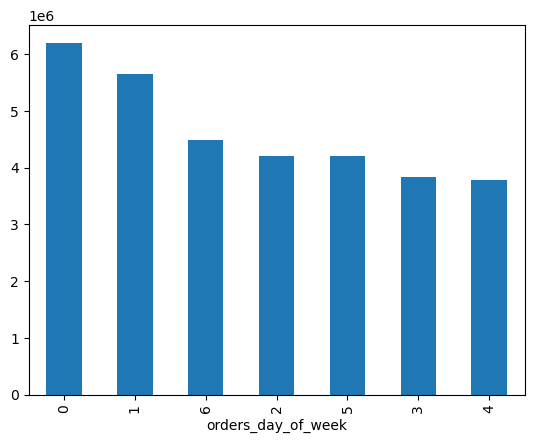

In [10]:
# Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

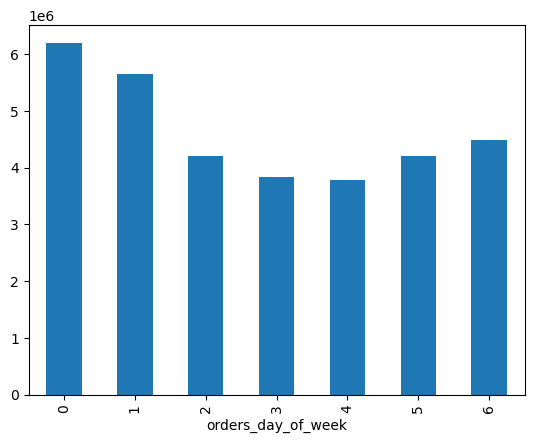

In [14]:
# Create a bar chart with original index order

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

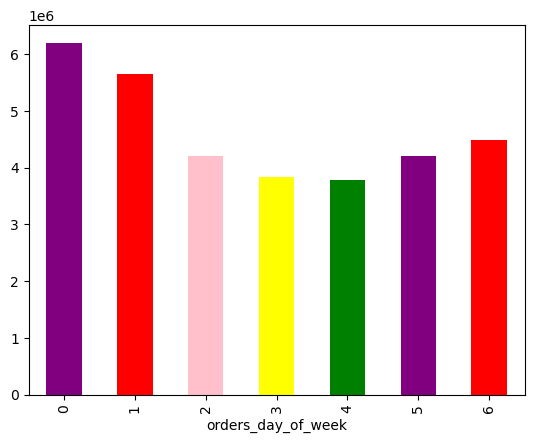

In [20]:
# Adding colors

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'yellow', 'green'])

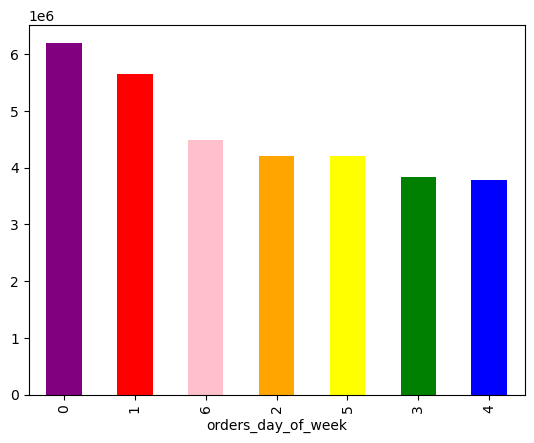

In [22]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [24]:
# Saving the chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots (Results differ because I addressed outlier by myself before)

<Axes: ylabel='Frequency'>

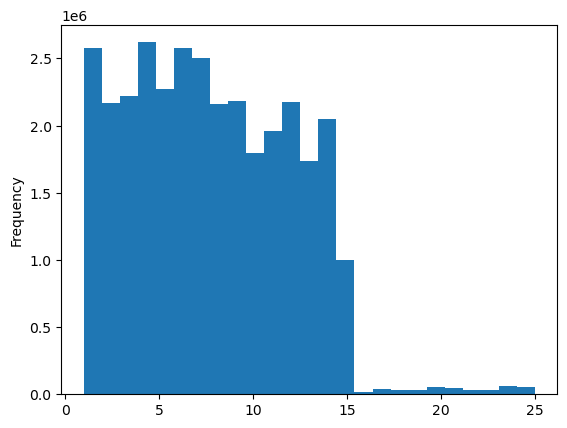

In [31]:
# Histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

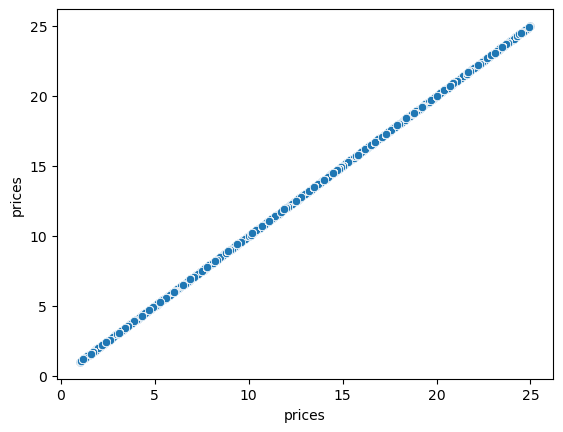

In [37]:
# scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [38]:
# Looking for outliers

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag


In [41]:
# To turn the otliers into NaNs

# ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [43]:
# Check max price

ords_prods_merge['prices'].max()

25.0

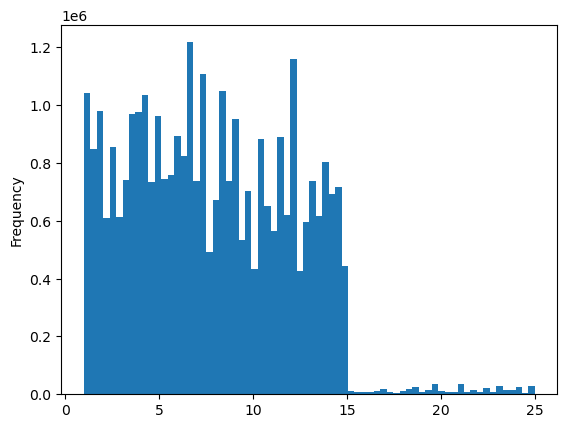

In [45]:
# Histogram with higher bins

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [51]:
# Saving the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

### Creating Line Charts

### Sampling Data

In [55]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [57]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [59]:
# check the samples

len(ords_prods_merge)

32399732

In [63]:
len(big) + len(small)


32399732

In [71]:
# pick only 2 columns we want

df_2 = small[['orders_day_of_week','prices']]

In [73]:
df_2.shape

(9719609, 2)

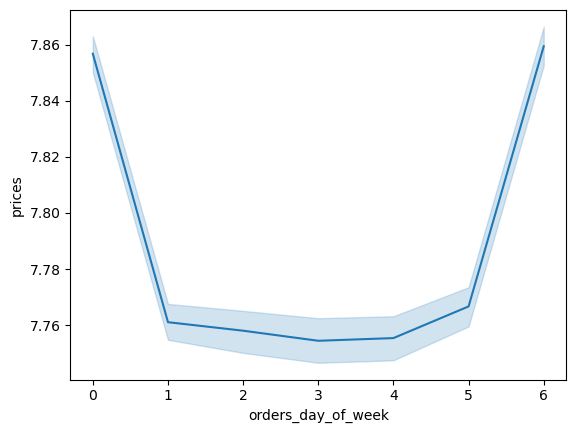

In [75]:
# Creating the line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')